# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

Who:    
- Individuals responsible for the digital marketing of a store's online presence.

What: 
- Create digital marketing strategies to improve customer engagement and online traffic of the store.

How:
- Through analyzing collected data on customers' demographics, historical purchase data, and customer behavior online. 

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
md = pd.read_csv('digital_marketing_campaign_dataset.csv')
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

In [4]:
md.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [5]:
duplicate_customers = md['CustomerID'].duplicated().sum()
print(f"Number of duplicate CustomerIDs: {duplicate_customers}")

if duplicate_customers > 0:
    print("Duplicate CustomerID rows:")
    display(md[md['CustomerID'].duplicated(keep=False)].sort_values('CustomerID'))

Number of duplicate CustomerIDs: 0


In [6]:
for column in md.columns:
    print(f"Column: {column}")
    
    if pd.api.types.is_numeric_dtype(md[column]):
        print(f"  Mean: {md[column].mean()}")
        print(f"  Median: {md[column].median()}")
    else:
        print("  Mean: Not applicable for non-numeric data")
        print("  Median: Not applicable for non-numeric data")
        
    mode_result = md[column].mode()
    if not mode_result.empty:
        print(f"  Mode: {mode_result[0]}")
    else:
        print("  Mode: No unique mode found")
        
    print("-" * 30)

Column: CustomerID
  Mean: 11999.5
  Median: 11999.5
  Mode: 8000
------------------------------
Column: Age
  Mean: 43.6255
  Median: 43.0
  Mode: 64
------------------------------
Column: Gender
  Mean: Not applicable for non-numeric data
  Median: Not applicable for non-numeric data
  Mode: Female
------------------------------
Column: Income
  Mean: 84664.19675
  Median: 84926.5
  Mode: 50268
------------------------------
Column: CampaignChannel
  Mean: Not applicable for non-numeric data
  Median: Not applicable for non-numeric data
  Mode: Referral
------------------------------
Column: CampaignType
  Mean: Not applicable for non-numeric data
  Median: Not applicable for non-numeric data
  Mode: Conversion
------------------------------
Column: AdSpend
  Mean: 5000.944830424953
  Median: 5013.440043527517
  Mode: 100.05481308980612
------------------------------
Column: ClickThroughRate
  Mean: 0.15482864915095626
  Median: 0.1545054889779906
  Mode: 0.010004853514801
----------

In [7]:
md.isnull().sum()

CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

In [8]:
numeric_cols = md.select_dtypes(include=np.number).columns

negative_values = (md[numeric_cols] < 0).sum()

print("Negative value counts per column:")
print(negative_values[negative_values > 0])

Negative value counts per column:
Series([], dtype: int64)


In [9]:
categorical_cols = md.select_dtypes(include=['object', 'category']).columns

print("Categorical variables:")
for col in categorical_cols:
    print(f"- {col}")


Categorical variables:
- Gender
- CampaignChannel
- CampaignType
- AdvertisingPlatform
- AdvertisingTool


In [10]:
md_encoded = pd.get_dummies(md, columns=['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool'])

md_encoded.head()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,...,CampaignChannel_PPC,CampaignChannel_Referral,CampaignChannel_SEO,CampaignChannel_Social Media,CampaignType_Awareness,CampaignType_Consideration,CampaignType_Conversion,CampaignType_Retention,AdvertisingPlatform_IsConfid,AdvertisingTool_ToolConfid
0,8000,56,136912,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,...,False,False,False,True,True,False,False,False,True,True
1,8001,69,41760,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,...,False,False,False,False,False,False,False,True,True,True
2,8002,46,88456,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,...,True,False,False,False,True,False,False,False,True,True
3,8003,32,44085,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,...,True,False,False,False,False,False,True,False,True,True
4,8004,60,83964,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,...,True,False,False,False,False,False,True,False,True,True


This data is very usable, it contained no null or missing values, which greately simplifies cleaning the data. I have not found that there is any class imbalance within any of the columns. 

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data (p. 1-17). Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

In [12]:
import matplotlib.pyplot as plt

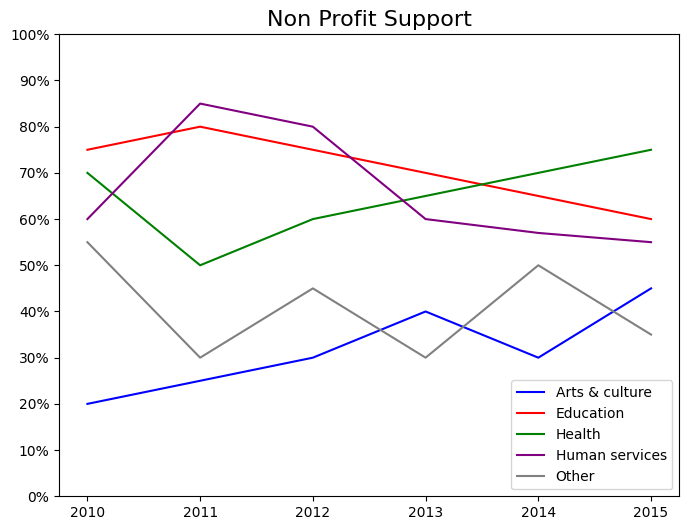

In [19]:
# Data estimated from the graph
years = [2010, 2011, 2012, 2013, 2014, 2015]
arts_culture = [20, 25, 30, 40, 30, 45]
education = [75, 80, 75, 70, 65, 60]
health = [70, 50, 60, 65, 70, 75]
human_services = [60, 85, 80, 60, 57, 55]
other = [55, 30, 45, 30, 50, 35]

plt.figure(figsize=(8, 6))

plt.plot(years, arts_culture, label='Arts & culture', color='blue')
plt.plot(years, education, label='Education', color='red')
plt.plot(years, health, label='Health', color='green')
plt.plot(years, human_services, label='Human services', color='purple')
plt.plot(years, other, label='Other', color='grey')

plt.title('Non Profit Support', fontsize=16)
plt.xlabel('')
plt.ylabel('')

plt.ylim(0, 100)
plt.yticks(np.arange(0, 101, 10), [f'{i}%' for i in range(0, 101, 10)])

plt.legend()

plt.grid(False) 
plt.show()